## Project Name - **Baseball Case Study Projec**
![Tommy_Milone_gives_up_a_home_run_to_Mike_Trout_on_May_21,_2017.jpg](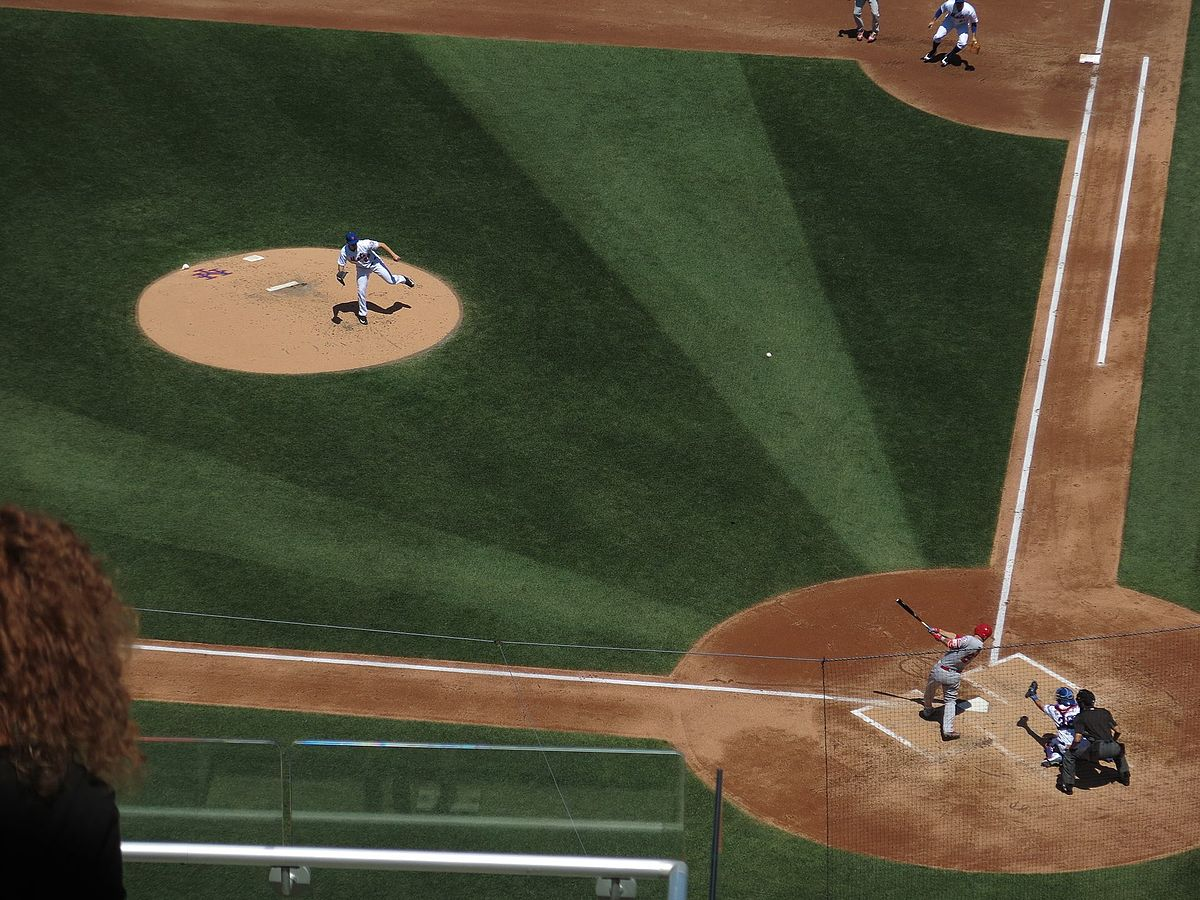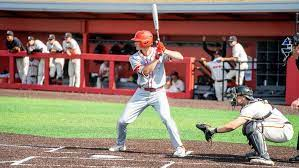)

##### Name - Aman Mulla.
##### Batch - DS2307



# **Project Summary -**

**This project focuses on leveraging data from the 2014 Major League Baseball (MLB) season to construct an algorithm aimed at predicting the number of wins a team might achieve in the 2015 season. The dataset comprises 16 distinct features, serving as inputs for the machine learning model. These features encompass a range of indicators associated with team performance and success within the sport. By employing this comprehensive dataset, the objective is to develop an accurate predictive model that can estimate the number of wins a team is likely to secure in the subsequent season. The project's ultimate goal is to harness these indicators from the previous season to provide insights into and foresee potential success in the forthcoming MLB season, facilitating informed decision-making and strategic planning within the realm of baseball analytics.**

By understanding input features from desription, Adding here in shortly

1. **W** - Number of wins credited to a pitcher.
2. **R** - Runs scored by the team.
3. **AB** - At bats or plate appearances excluding certain situations.
4. **H** - Hits made by the batter.
5. **2B** - Doubles, hits allowing the batter to safely reach second base.
6. **3B** - Triples, hits allowing the batter to safely reach third base.
7. **HR** - Home runs scored by the team.
8. **BB** - Bases on balls or walks received by a batter.
9. **SO** - Strikeouts by the team's batters.
10. **SB** - Stolen bases achieved by the team.
11. **RA** - Runs Average, a measure of runs allowed or scored.
12. **ER** - Earned runs, runs scored without the aid of errors.
13. **ERA** - Earned Run Average, earned runs allowed by a pitcher per nine innings.
14. **CG** - Complete games pitched by a player.
15. **SHO** - Shutouts pitched by a player.
16. **SV** - Saves earned by a pitcher under specific circumstances.
17. **E** - Errors committed by the fielders.


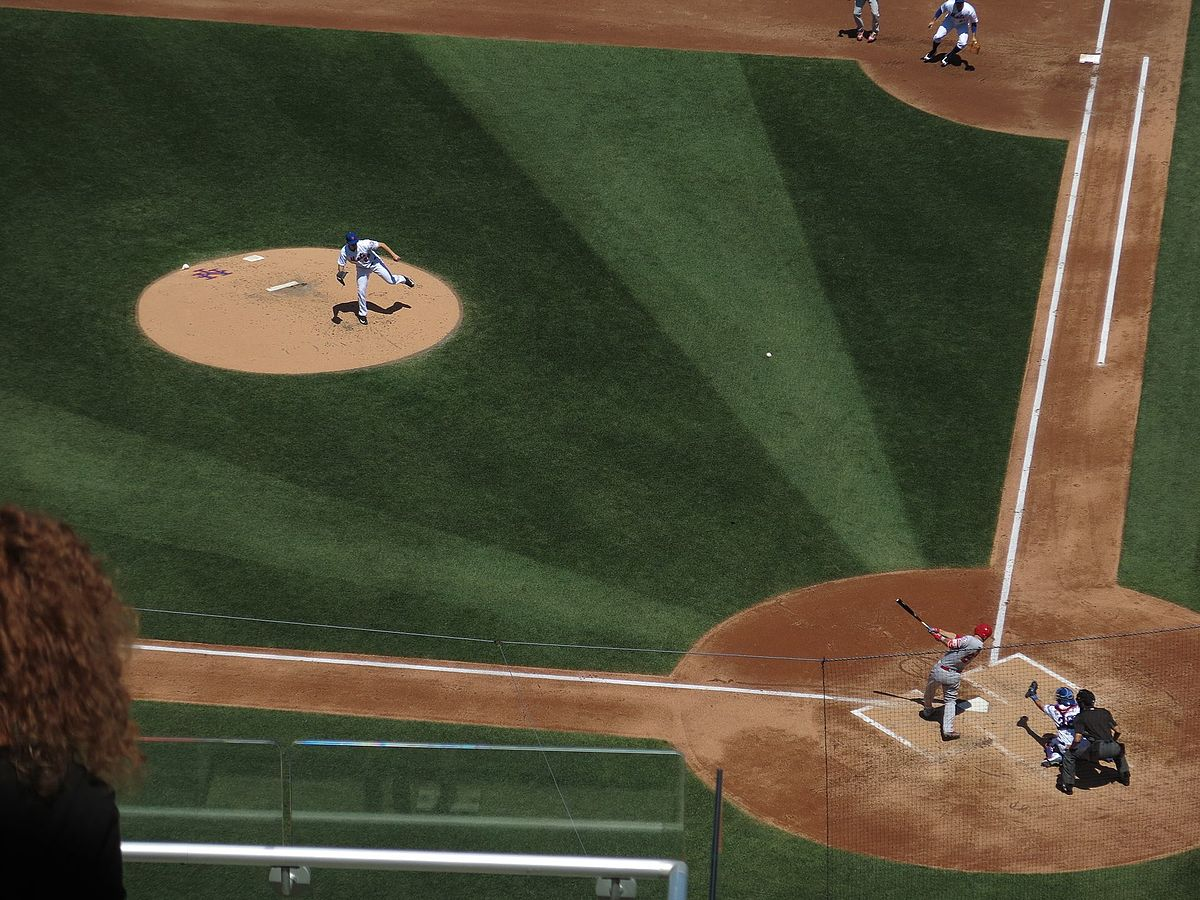

# **Problem Statement**

**Develop a machine learning model using the 2014 Major League Baseball dataset to predict the number of wins a team might achieve in the 2015 season based on various performance indicators such as runs scored, hits, strikeouts, earned run average, and other key metrics. The objective is to create an accurate predictive model that utilizes historical team statistics to forecast the potential success of MLB teams in the upcoming season, aiding in strategic decision-making and performance analysis within the realm of baseball analytics.**

## Knowing data and variable in dataset

In [38]:
# Will import necessary libraires

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
pd.set_option('display.max_rows',None)

In [39]:
# Loading Dataset

baseball_data = pd.read_csv('/content/drive/MyDrive/DataSets/baseball.csv')

baseball_data.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


**From head() dataset, we can observe that we have all data in numericle form only and we have column name in short form. Description and meaning of each is mentioned above.**

In [40]:
baseball_data.shape

(30, 17)

Find that is small dataset with 30 rows and 17 columns. From 17 we have **W - Wins** is y variable and rest all are x varibales.

In [41]:
baseball_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


From .info() we can observe that all columns in int and flote datatype only with no null values in any column.


In [42]:
baseball_data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<Axes: >

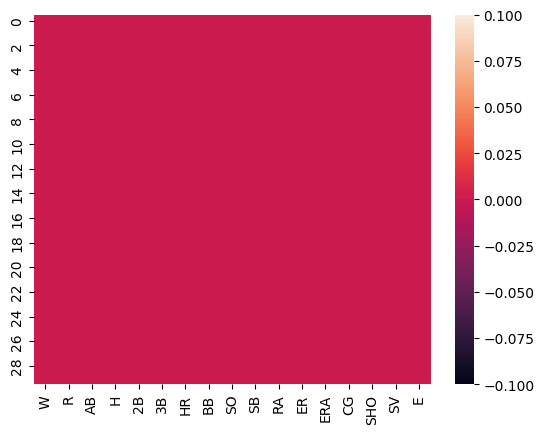

In [43]:
sns.heatmap(baseball_data.isnull())

In [44]:
baseball_data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


From .describe() we can observe mean, standard Deviation, minimum value, quantile values and maximum values for each vearibale.

#### Chart - 1

### **Pitcher Wins vs. Runs Scored**

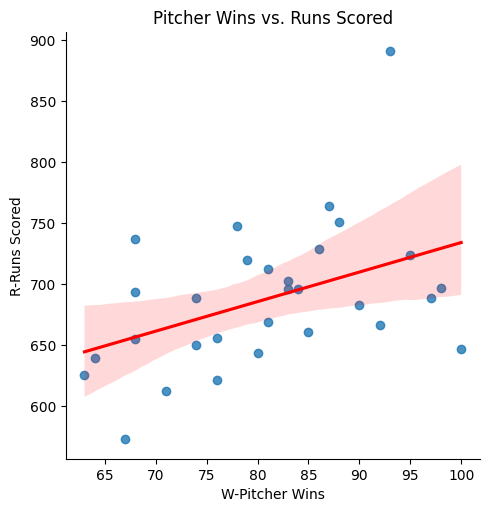

In [45]:
sns.lmplot(data=baseball_data,x='W',y='R',line_kws=dict(color="r"))
plt.xlabel('W-Pitcher Wins')
plt.ylabel('R-Runs Scored')
plt.title('Pitcher Wins vs. Runs Scored')
plt.show()

**Insights from above graph** -


*   The red regression line on the scatter plot indicates the overall trend between Pitcher Wins and Runs Scored.
*   The line slopes upwards, it implies a positive correlation—more pitcher wins tend to coincide with higher runs scored.

**Number of wins credited to pitchers corresponds to the team's offensive performance in terms of runs scored, understanding the overall relationship and potential predictive tendencies between these two variables in Major League Baseball.**



#### Chart - 2

### **Hits vs. Strikeouts**

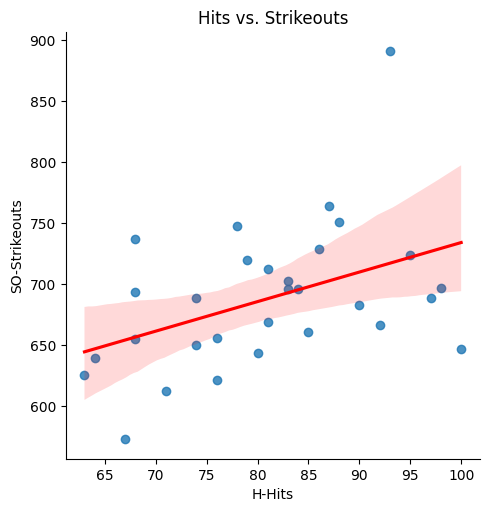

In [46]:
sns.lmplot(data=baseball_data,x='W',y='R',line_kws=dict(color="r"))
plt.xlabel('H-Hits')
plt.ylabel('SO-Strikeouts')
plt.title('Hits vs. Strikeouts')
plt.show()

**Insights from above graph** -

*   The red regression line on the scatter plot indicates the overall trend between Hits and Strikeouts.
*   The line slopes upwards, it implies a positive correlation—more Hits tend to coincide with more Srikeouts

#### Chart - 3

### **Earned Run Average vs. Complete Games**

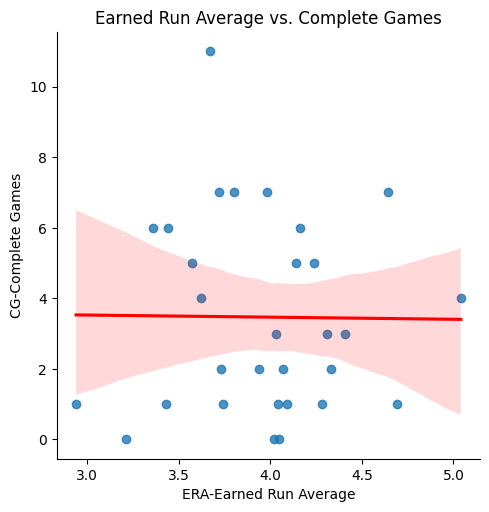

In [47]:
sns.lmplot(data=baseball_data,x='ERA',y='CG',line_kws=dict(color="r"))
plt.xlabel('ERA-Earned Run Average')
plt.ylabel('CG-Complete Games')
plt.title('Earned Run Average vs. Complete Games')
plt.show()

**Insights from above graph** -

*   The linear regression line and the scatter plot points indicate the direction and strength of the relationship between ERA and CG. A negative slope might suggest that as the Earned Run Average decreases, the number of Complete Games tends to increase, or vice versa.
*   A lower ERA usually signifies a pitcher's effectiveness in preventing earned runs. A positive correlation between lower ERA and higher CG could imply that pitchers with better effectiveness tend to pitch more complete games, showcasing their endurance and pivotal role in finishing games.

**This plot provides how Earned Run Average and Complete Games might be related in Major League Baseball, offering potential insights into pitching effectiveness, player endurance, and team strategies.**

#### Chart - 4

### **Stolen Bases vs. Errors**

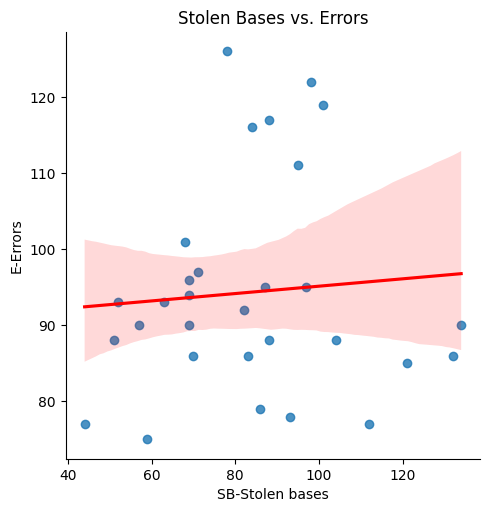

In [48]:
sns.lmplot(data=baseball_data,x='SB',y='E',line_kws=dict(color="r"))
plt.xlabel('SB-Stolen bases')
plt.ylabel('E-Errors')
plt.title('Stolen Bases vs. Errors')
plt.show()

**Insights from above graph** -

*   Observing the dispersion of data points around the regression line reveal how loosely the relationship holds.Points are dispersed widely, the correlation is weaker.
*   Slight Positive regression line on the scatter plot indicates the overall trend between Stolen Bases and Errors.

**Analyzing this graph can offer valuable insights into the relationship between aggressive base-running (stolen bases) and defensive errors in Major League Baseball, aiding in understanding strategic dynamics between offense and defense in the sport.**

#### Chart - 5

### **Home Runs vs. Shutouts**

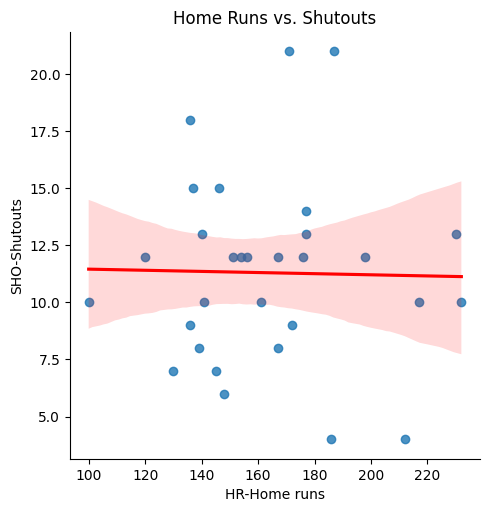

In [49]:
sns.lmplot(data=baseball_data,x='HR',y='SHO',line_kws=dict(color="r"))
plt.xlabel('HR-Home runs')
plt.ylabel('SHO-Shutouts')
plt.title('Home Runs vs. Shutouts')
plt.show()

**Insights from above graph** -

*   The linear regression line indicate there's a linear relationship between the number of home runs scored by a team and the number of shutouts pitched by players.
*   Higher home run counts coincide with instances where teams pitch more shutouts. This indicate that teams with strong offensive capabilities in hitting home runs might also have pitching strengths resulting in fewer runs conceded.

**These insights offer a glimpse into potential relationships between offensive prowess (home runs) and pitching success (shutouts) within the context of baseball, aiding in understanding the interplay between these key metrics in team performance.**

#### Chart - 6

### **Bases on Balls vs. Saves**

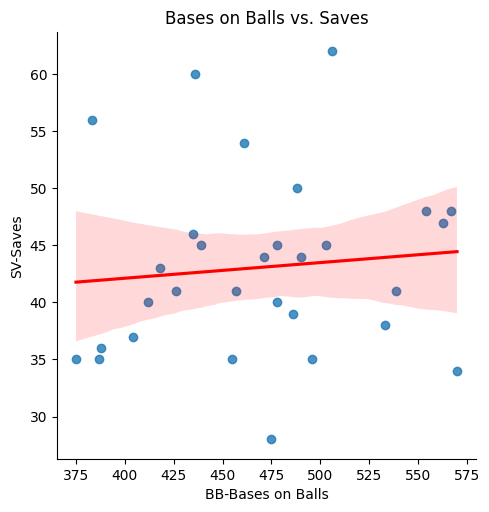

In [50]:
sns.lmplot(data=baseball_data,x='BB',y='SV',line_kws=dict(color="r"))
plt.xlabel('BB-Bases on Balls')
plt.ylabel('SV-Saves')
plt.title('Bases on Balls vs. Saves')
plt.show()

**Insights from above graph** -

*   The plot and the regression line indicate there's a relationship between the number of bases on balls (walks received) and the number of saves earned by pitchers. The positive slope of the regression line suggests the direction and strength of this relationship.
*   A positive relationship or slope imply that as the number of walks increases, there  be a tendency for more saves to be earned.

**This graph aims to uncover potential connections between the number of walks and the number of saves in baseball, offering insights into the role of pitching strategy and its impact on securing wins.**

#### Chart - 7

### **Distribution plot for W - Wins**

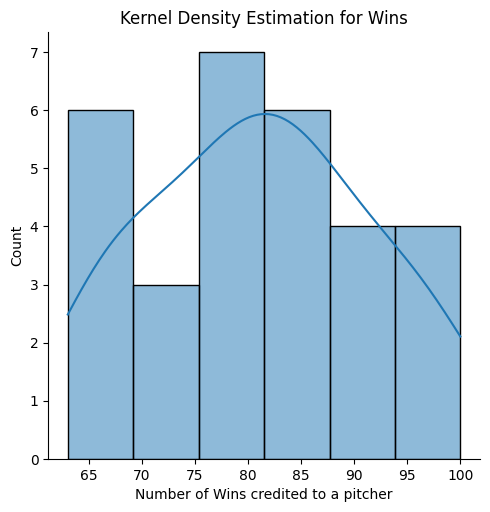

In [51]:
sns.displot(data=baseball_data, x='W', kde=True)
plt.xlabel('Number of Wins credited to a pitcher')
plt.title('Kernel Density Estimation for Wins')
plt.show()

**Insights from above graph** -
1. The KDE plot displays the distribution of the number of wins credited to pitchers. It indicates the density of wins across different values, showcasing where the concentration of win counts lies within the dataset.
2. The peak of the KDE plot suggests the most common or central values for wins credited to pitchers.

#### Chart - 8

### **Pair Plot**

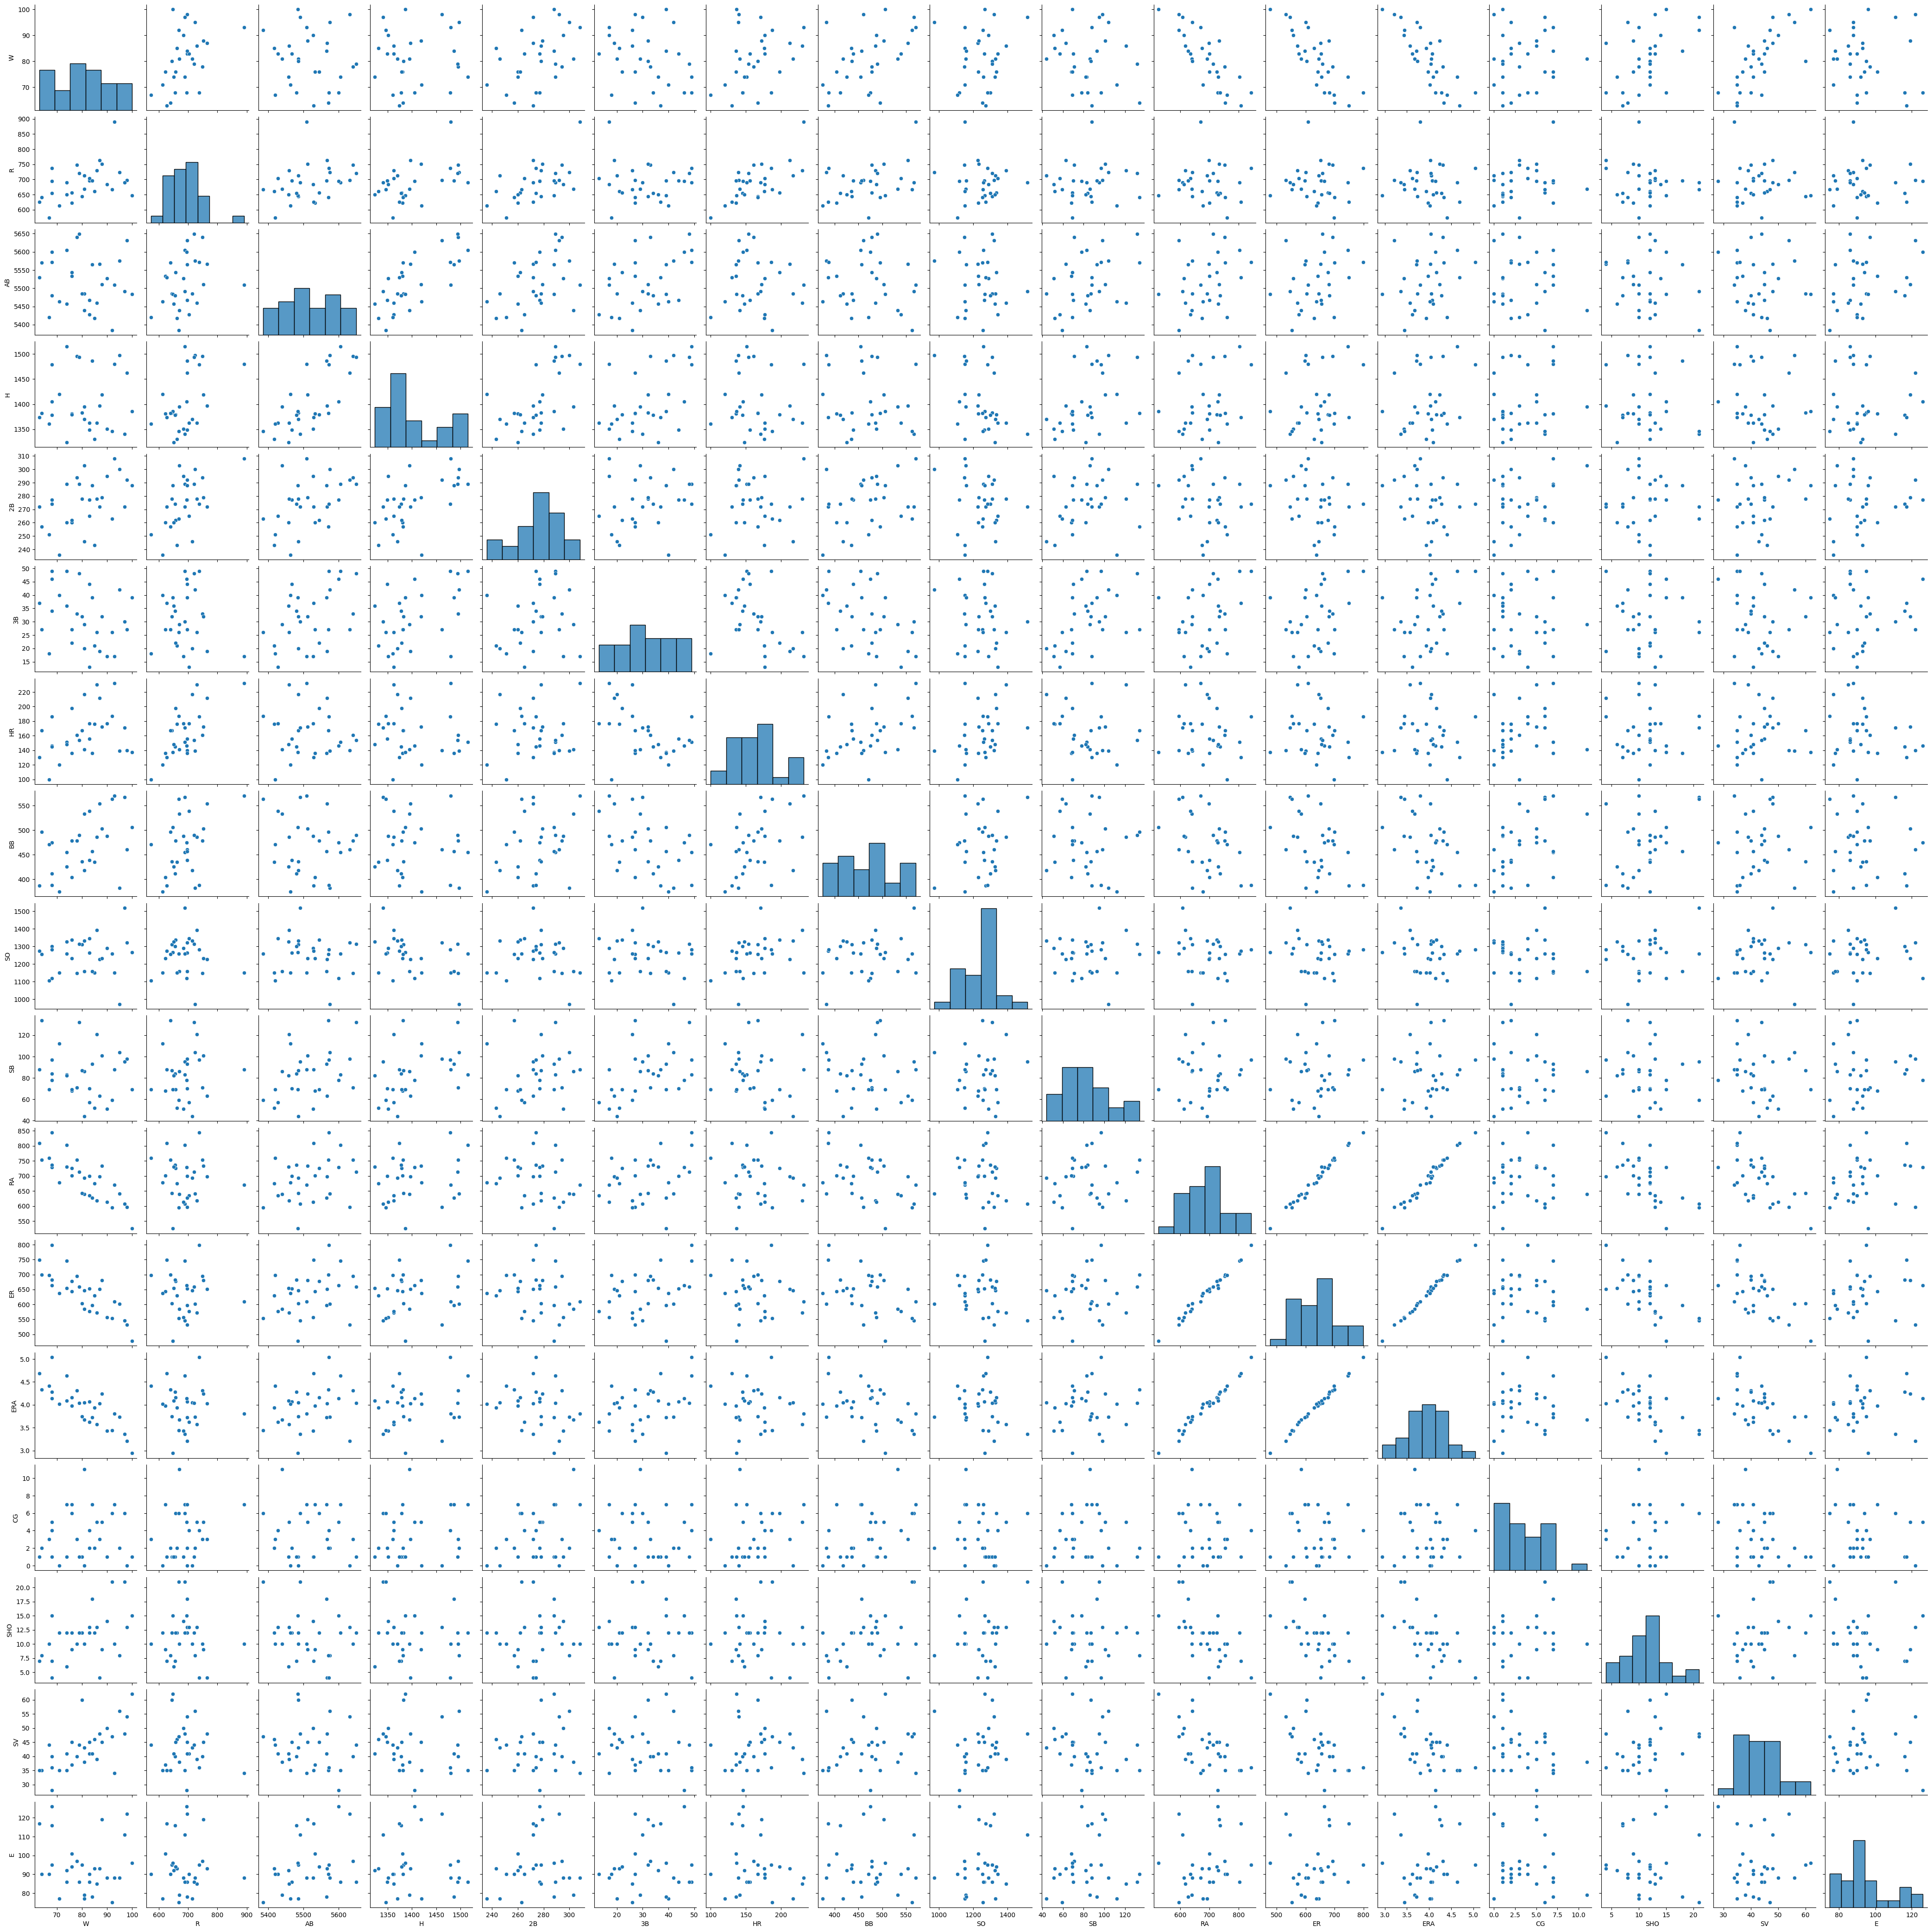

In [53]:
sns.pairplot(baseball_data)

plt.show()

#### Chart - 8

### **Heatmap**

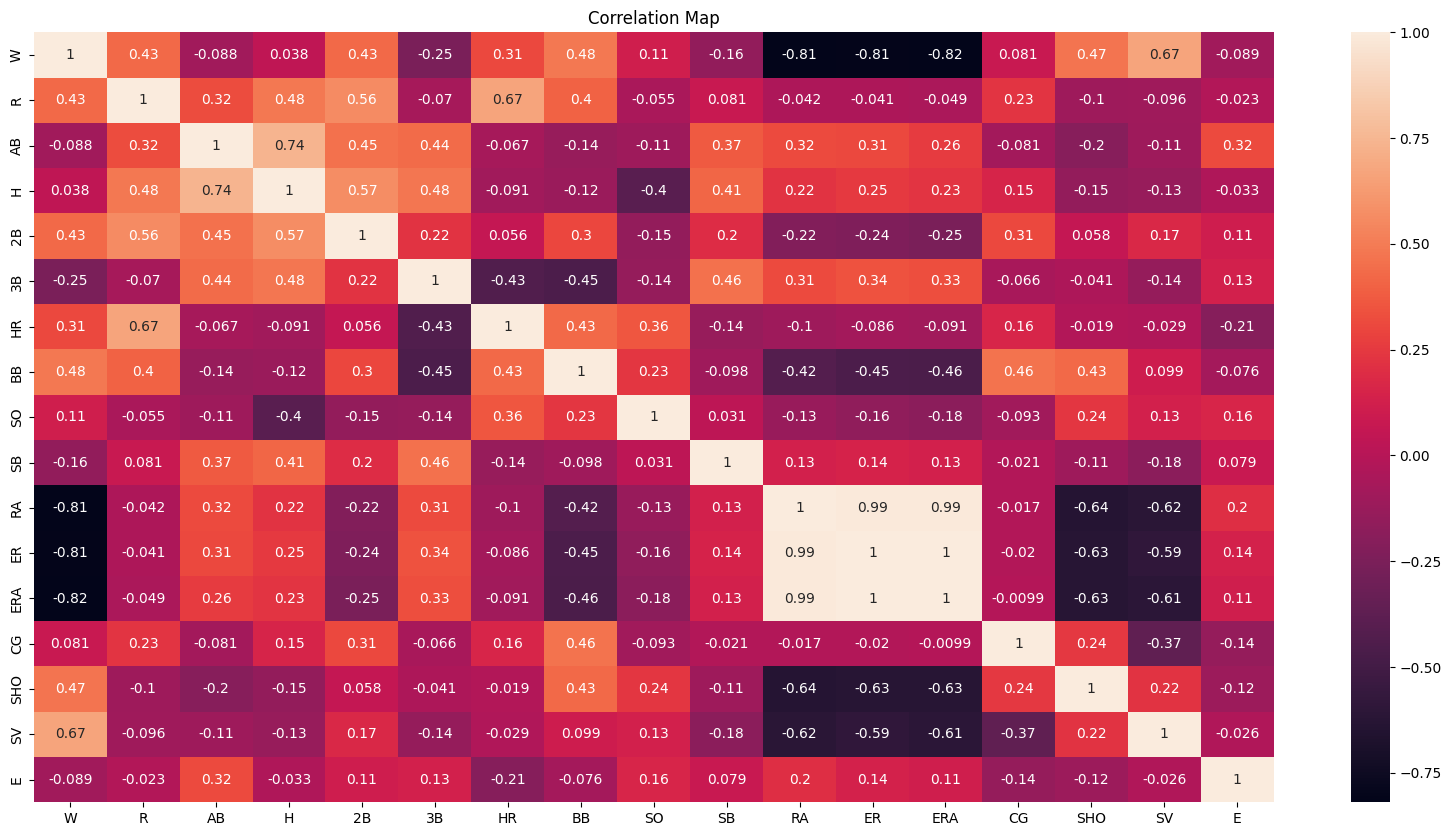

In [59]:
correlation_data = baseball_data

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(20,10))

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Map')
plt.show()

To get VIF, will first define x and y varibales for our ML Model

In [60]:
x = baseball_data.drop(columns=['W'])
y = baseball_data['W']

In [63]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scalar = StandardScaler()
x_scaled=scalar.fit_transform(x)

# VIF

vif = pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,11.522370,R
1,13.311532,AB
2,10.070668,H
3,4.019297,2B
4,3.294146,3B
5,10.079902,HR
6,3.806098,BB
7,2.652401,SO
8,2.102684,SB
9,191.839155,RA


**Features like 'RA' (Runs Average), 'ER' (Earned Runs), and 'ERA' (Earned Run Average) have extremely high VIF values**, indicating strong multicollinearity issues. This suggests that these features are highly correlated with other predictors, potentially making their individual contributions less reliable when used together in a regression model.

**Features such as 'BB' (Bases on Balls), 'SO' (Strikeouts), 'SV' (Saves), 'CG' (Complete Games), 'SHO' (Shutouts), and 'R' (Runs scored) have VIF values indicating moderate multicollinearity.** While not as severe as the high VIF features, their correlations might still affect the model's coefficient estimates.

**Features like 'SB' (Stolen Bases), 'E' (Errors), '2B' (Doubles), '3B' (Triples), and 'H' (Hits) show relatively low VIF values, suggesting less multicollinearity with other predictors.** These features could be considered more independent within the dataset.

### ML Model - 1

#### Using all Variables for ML Model-1

In [67]:
# Importing Libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
import math

Linear Regression MSE For Model 1:  270.3253807274042
Linear Regression RMSE For Model 1:  16.441574764219034
Linear Regression R-squared For Model 1:  -2.035258641380612


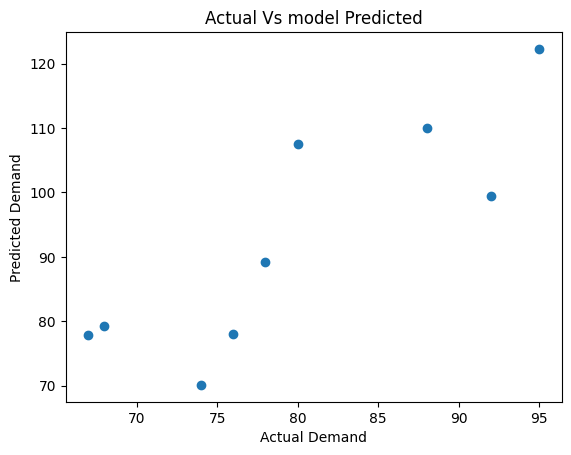

In [70]:
# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=248)

("Shape of x_train",x_train.shape)
("Shape of x_test",x_test.shape)
("Shape of y_train",y_train.shape)
("Shape of y_train",y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
LR = LinearRegression()
LR.fit(x_train, y_train)

# Predicting on test set results

y_pred = LR.predict(x_test)

y_pred

# Evaluate the Linear Regression model
LR_predictions = LR.predict(x_test)
LR_mse = mean_squared_error(y_test, LR_predictions)
LR_RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
LR_r2 = r2_score(y_test, LR_predictions)
print("Linear Regression MSE For Model 1: ", LR_mse)
print("Linear Regression RMSE For Model 1: ", LR_RMSE)
print("Linear Regression R-squared For Model 1: ", LR_r2)


plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()

In [69]:
# Importing Necessary Libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print("Lasso Regression MSE: ", lasso_mse)
print("Lasso Regression R-squared: ", lasso_r2)
print("Best Lasso Alpha: ", lasso_grid.best_params_['alpha'])


# Similarly for ridge regression


# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print("Ridge Regression MSE: ", ridge_mse)
print("Ridge Regression R-squared: ", ridge_r2)
print("Best Ridge Alpha: ", ridge_grid.best_params_['alpha'])

Lasso Regression MSE:  76.26988784934554
Lasso Regression R-squared:  0.14362892766884006
Best Lasso Alpha:  0.1
Ridge Regression MSE:  40.35331573996413
Ridge Regression R-squared:  0.5469062136211402
Best Ridge Alpha:  1


**Insights from ML Model 1:**

*   The Linear Regression model performs poorly with a high MSE and negative R-squared. The negative R-squared indicates that this model is worse than a horizontal line, showing no predictive power and possibly indicating severe overfitting or inappropriate use of the model.
*   Lasso Regression significantly improves over the Linear Regression with a notably lower MSE and a positive R-squared, showing some predictive capability. Lasso's ability to perform feature selection might have helped in reducing overfitting or multicollinearity issues present in the linear model.
*   Ridge Regression performs even better than Lasso and Linear Regression with the lowest MSE and a higher R-squared. It shows improved predictive power, indicating a better fit to the data compared to both the Linear and Lasso models.




### ML Model - 2

#### Selected features  (From VIF score neglecting features whose score is more than 5)

Linear Regression MSE For Model 2:  153.4741060579764
Linear Regression RMSE For Model 2:  12.388466654835714
Linear Regression R-squared For Model 2:  -0.7232329623920275


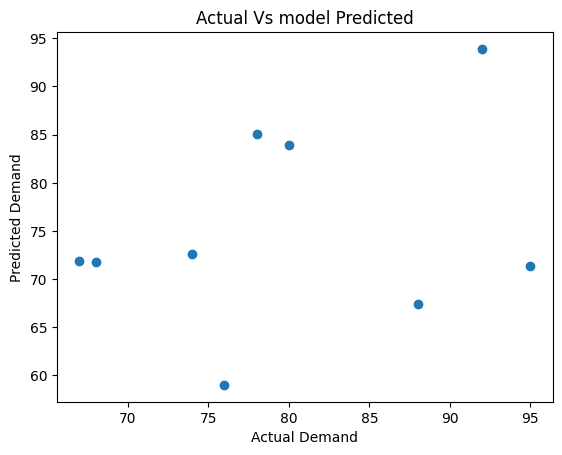

Lasso Regression MSE:  124.16547124425607
Lasso Regression R-squared:  -0.3941507029088911
Best Lasso Alpha:  0.1
Ridge Regression MSE:  97.87086995530397
Ridge Regression R-squared:  -0.09891051654832572
Best Ridge Alpha:  1


In [73]:
x = baseball_data[['2B', '3B','BB', 'SO', 'SB','CG', 'SHO','E']]

y = baseball_data['W']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=248)

("Shape of x_train",x_train.shape)
("Shape of x_test",x_test.shape)
("Shape of y_train",y_train.shape)
("Shape of y_train",y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
LR = LinearRegression()
LR.fit(x_train, y_train)

# Predicting on test set results

y_pred = LR.predict(x_test)

y_pred

# Evaluate the Linear Regression model
LR_predictions = LR.predict(x_test)
LR_mse = mean_squared_error(y_test, LR_predictions)
LR_RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
LR_r2 = r2_score(y_test, LR_predictions)
print("Linear Regression MSE For Model 2: ", LR_mse)
print("Linear Regression RMSE For Model 2: ", LR_RMSE)
print("Linear Regression R-squared For Model 2: ", LR_r2)


plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()

# Importing Necessary Libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print("Lasso Regression MSE: ", lasso_mse)
print("Lasso Regression R-squared: ", lasso_r2)
print("Best Lasso Alpha: ", lasso_grid.best_params_['alpha'])


# Similarly for ridge regression


# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print("Ridge Regression MSE: ", ridge_mse)
print("Ridge Regression R-squared: ", ridge_r2)
print("Best Ridge Alpha: ", ridge_grid.best_params_['alpha'])

**Insights from ML Model 2:**


*   The linear regression model performs poorly with a high MSE and negative R-squared value. The negative R-squared indicates that this model doesn't fit the data well and might be worse than a model that predicts the mean of the target variable.
*   Lasso regression improves upon the linear regression model, reducing the MSE and somewhat improving the R-squared value. However, it still indicates poor fit or performance due to the negative R-squared value.
*   Ridge regression performs better than both linear and Lasso regression models, showing a lower MSE and a relatively improved R-squared value. However, the negative R-squared suggests that this model might not capture the variability in the data effectively.



### Will Check for outliers

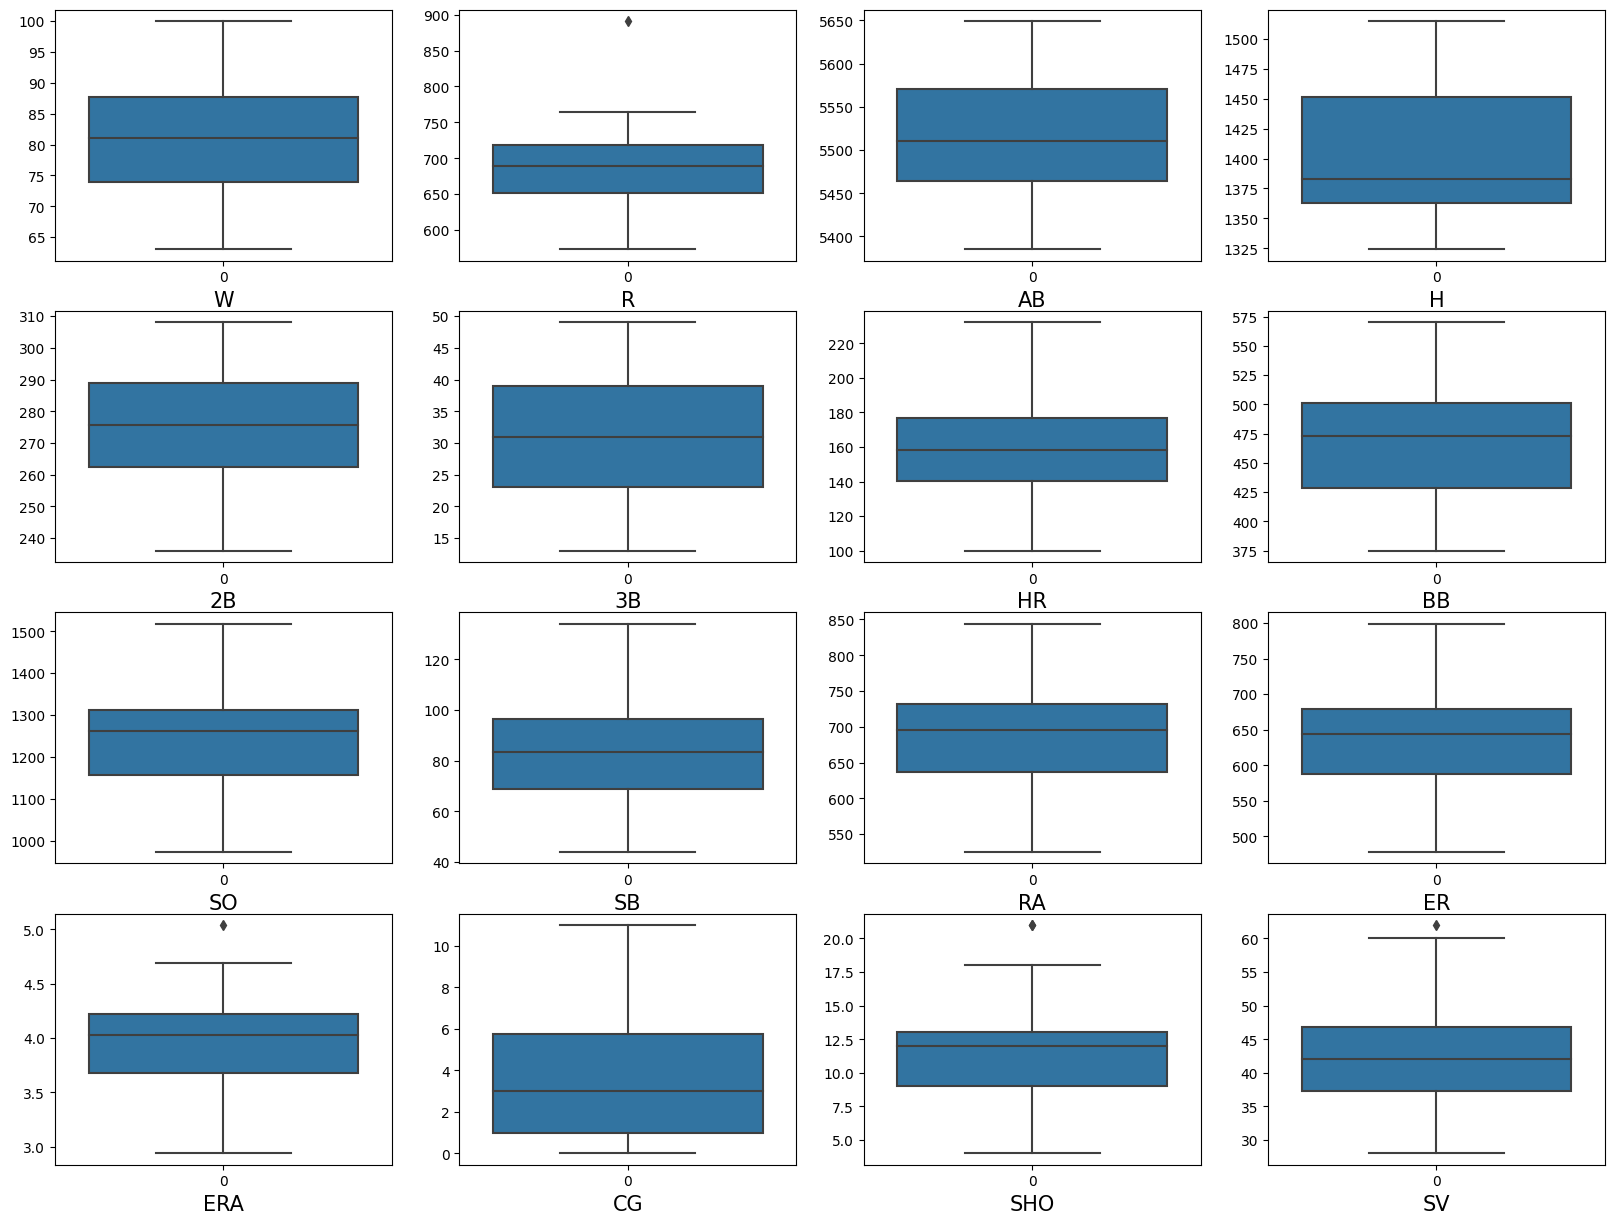

In [74]:
plt.figure(figsize=(20,15))
graph = 1

for column in baseball_data:
  if graph<=16:
    plt.subplot(4,4,graph)
    ax=sns.boxplot(data= baseball_data[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()


### From above box plot can observe that, have very less ouliers present in dataset. As dataset shape is very small, not deleting any of outliers to maintain data balance. Will check with multiple ML model to get better results.

### ML Model - 3

#### knn Regression Model

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [71]:
baseball_data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [77]:
x = baseball_data[['R', 'AB','2B', '3B','BB', 'SO','SB','RA','CG', 'SHO', 'SV']]

y = baseball_data['W']

# Imporing Library

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Normalization
scalar = StandardScaler()

x_scalar = scalar.fit_transform(baseball_data)

best_features = SelectKBest(score_func=f_classif,k=1)

fit = best_features.fit(x,y)

df_score = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(x.columns)


feature_scores = pd.concat([df_columns,df_score],axis=1)

feature_scores.columns = ['Feature_Name','Score']

print(feature_scores.nlargest(1,'Score'))

# Fitting knn Model
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(x_train, y_train)

# Evaluting matrix
def metric_score(model, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = model.predict(x_train)
    else:
        y_pred = model.predict(x_test)

    mse = mean_squared_error(y_train if train else y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train if train else y_test, y_pred)

    return mse, rmse, r2

# Calculate training and testing scores
train_mse, train_rmse, train_r2 = metric_score(knn, x_train, x_test, y_train, y_test, train=True)
test_mse, test_rmse, test_r2 = metric_score(knn, x_train, x_test, y_train, y_test, train=False)

print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R2:", train_r2)

print("Testing MSE:", test_mse)
print("Testing RMSE:", test_rmse)
print("Testing R2:", test_r2)

from sklearn.model_selection import KFold,cross_val_score
k_f =KFold(n_splits=5)

k_f

for train,test in k_f.split([12,23,35,46,51,63,75,86,96,108]):
  print('train : ',train,'test :',test)

cross_val_score(knn,x_scalar,y,cv=5)
cross_val_score(knn,x_scalar,y,cv=5).mean

from sklearn.model_selection import GridSearchCV
param_grid = {'algorithm': ['kd_tree','brute'],
              'leaf_size':[3,5,6,7,8],
              'n_neighbors': [3,5,7,9,11,13]}

gridsearch = GridSearchCV(estimator =knn,param_grid=param_grid)

gridsearch.fit(x_train,y_train)

gridsearch.best_score_

gridsearch.best_estimator_

metric_score(knn,x_train,x_test,y_train,y_test,train=True) # for training score

metric_score(knn,x_train,x_test,y_train,y_test,train=False)  # for testing score

  Feature_Name     Score
0            R  4.325471
Training MSE: 58.19428571428572
Training RMSE: 7.628517923835909
Training R2: 0.479797300036486
Testing MSE: 111.48888888888887
Testing RMSE: 10.55882990150371
Testing R2: -0.2518159135015243
train :  [2 3 4 5 6 7 8 9] test : [0 1]
train :  [0 1 4 5 6 7 8 9] test : [2 3]
train :  [0 1 2 3 6 7 8 9] test : [4 5]
train :  [0 1 2 3 4 5 8 9] test : [6 7]
train :  [0 1 2 3 4 5 6 7] test : [8 9]


(111.48888888888887, 10.55882990150371, -0.2518159135015243)

**Insights from kNN model:**

*   'R' has a score of 4.33, indicating its higher importance in predicting the target variable (number of wins). This suggests that 'R' (Runs scored by the team) is a significant predictor in the model.
*   The Mean Squared Error (MSE) on the training set is approximately 58.19, which signifies the average squared difference between the actual and predicted values of wins. Lower values indicate better model fit.
*   The Root Mean Squared Error (RMSE) on the training set is around 7.63, representing the standard deviation of the residuals. Lower values indicate better fit.The R-squared value of approximately 0.48 indicates that the model explains around 48% of the variance in the target variable, 'W' (number of wins).
*   The Mean Squared Error (MSE) on the testing set is about 111.49. A higher MSE on the testing set compared to the training set might suggest some overfitting or the model's inability to generalize well to unseen data.
*   The Root Mean Squared Error (RMSE) on the testing set is approximately 10.56, higher than the training RMSE, indicating a larger deviation of predictions from actual values in the testing data.
*   The negative R-squared value (-0.25) on the testing set suggests that the model performs worse than a model that simply predicts the mean of the target variable. It indicates poor predictive performance.



### ML Model - 4

#### Decision Tree Regression Model

In [78]:
from sklearn.tree import DecisionTreeRegressor

x = baseball_data[['R', 'AB','2B', '3B','BB', 'SO','SB','RA','CG', 'SHO', 'SV']]

y = baseball_data['W']

# Train and test set split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=348)

# Fitting Model
clf = DecisionTreeRegressor()
clf.fit(x_train,y_train)

# defining function for evalution matrix
def metric_score(model, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = model.predict(x_train)
        mse = mean_squared_error(y_train, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_train, y_pred)
        print('\n======Train Result======')
        print(f'Mean Squared Error (MSE): {mse:.2f}')
        print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
        print(f'R-squared (R2): {r2:.2f}')
    else:
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        print('\n======Test Result======')
        print(f'Mean Squared Error (MSE): {mse:.2f}')
        print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
        print(f'R-squared (R2): {r2:.2f}')

# Calling above function and passing dataset to check train and test score

metric_score(clf,x_train,x_test,y_train,y_test,train=True) # for training score

metric_score(clf,x_train,x_test,y_train,y_test,train=False)  # for testing score

# Now doing Hypertuning

grid_param = {
    'criterion': ['squared_error'],
    'max_depth': range(5, 10),
    'min_samples_leaf': range(1, 3),
    'min_samples_split': range(1, 5),
    'max_leaf_nodes': range(3, 6)
}

grid_search = GridSearchCV(estimator=clf,
                           param_grid=grid_param,
                           cv=5,
                           n_jobs=-1,
                           error_score=np.nan)

grid_search.fit(x_train, y_train)

best_parameters = grid_search.best_params_
print(best_parameters)

# Using best_param for model

clf = DecisionTreeRegressor(criterion='squared_error',min_samples_split=3,max_depth=5,min_samples_leaf=1)

clf.fit(x_train,y_train)

metric_score(clf,x_train,x_test,y_train,y_test,train=True) # for training score

metric_score(clf,x_train,x_test,y_train,y_test,train=False)  # for testing score


======Train Result======
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R2): 1.00

======Test Result======
Mean Squared Error (MSE): 84.88
Root Mean Squared Error (RMSE): 9.21
R-squared (R2): 0.19
{'criterion': 'squared_error', 'max_depth': 5, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}

======Train Result======
Mean Squared Error (MSE): 2.56
Root Mean Squared Error (RMSE): 1.60
R-squared (R2): 0.97

======Test Result======
Mean Squared Error (MSE): 82.11
Root Mean Squared Error (RMSE): 9.06
R-squared (R2): 0.22


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _val

**Insights from Decision Tree Regression Model:**

*   The model achieved exceptionally good performance on the training set with an MSE and RMSE of 0.00, indicating a perfect fit.The R-squared value of 1.00 suggests that the model perfectly captures the variance in the training data.
*   On the test set, the model's performance deteriorated significantly compared to the training set.The MSE and RMSE increased notably, indicating a considerable increase in prediction error on unseen data.

*   The model's performance on the training set decreased slightly after hyperparameter tuning, as evidenced by the increase in MSE and RMSE.However, the R-squared value of 0.97 still indicates a very high level of variance explained by the model.
*   Despite the hyperparameter tuning, the model's performance on the test set remained similar to the pre-tuning performance.





### ML Model - 5

#### RandomForesteRegressor

In [79]:
from sklearn.ensemble import RandomForestRegressor

x = baseball_data[['R', 'AB','2B', '3B','BB', 'SO','SB','RA','CG', 'SHO', 'SV']]

y = baseball_data['W']

# Train and test set split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=348)

# Random Forest Regression
rf_model = RandomForestRegressor()

rf_model.fit(x_train,y_train)

# defining function for evalution matrix
def metric_score(model, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = model.predict(x_train)
        mse = mean_squared_error(y_train, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_train, y_pred)
        print('\n======Train Result======')
        print(f'Mean Squared Error (MSE): {mse:.2f}')
        print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
        print(f'R-squared (R2): {r2:.2f}')
    else:
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        print('\n======Test Result======')
        print(f'Mean Squared Error (MSE): {mse:.2f}')
        print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
        print(f'R-squared (R2): {r2:.2f}')

# Calling above function and passing dataset to check train and test score

metric_score(rf_model,x_train,x_test,y_train,y_test,train=True) # for training score

metric_score(rf_model,x_train,x_test,y_train,y_test,train=False)  # for testing score


# Now doing Hypertuning

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=rf_params,
                           cv=5,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_parameters = grid_search.best_params_
print(best_parameters)

# Using the best parameters for the model
best_rf_model = RandomForestRegressor(**best_parameters)
best_rf_model.fit(x_train, y_train)

# Check scores for the model with the best parameters
metric_score(best_rf_model, x_train, x_test, y_train, y_test, train=True)  # for training score
metric_score(best_rf_model, x_train, x_test, y_train, y_test, train=False)  # for testing score


======Train Result======
Mean Squared Error (MSE): 8.32
Root Mean Squared Error (RMSE): 2.88
R-squared (R2): 0.92

======Test Result======
Mean Squared Error (MSE): 55.23
Root Mean Squared Error (RMSE): 7.43
R-squared (R2): 0.47
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}

======Train Result======
Mean Squared Error (MSE): 7.38
Root Mean Squared Error (RMSE): 2.72
R-squared (R2): 0.93

======Test Result======
Mean Squared Error (MSE): 52.59
Root Mean Squared Error (RMSE): 7.25
R-squared (R2): 0.50


**Insights from RandomForesteRegressor Model:**

* The initial model exhibited good performance on the training data with an MSE of 8.32 and an RMSE of 2.88. The R-squared value of 0.92 indicates that the model explains about 92% of the variance in the training set.However, on the test data, the performance decreased significantly, with an MSE of 55.23, an RMSE of 7.43, and an R-squared value of 0.47. This discrepancy suggests potential overfitting of the initial model to the training data.

* After hyperparameter tuning, there was a slight improvement in the training performance metrics, with the MSE decreasing to 7.38 and the RMSE decreasing to 2.72. The R-squared value increased slightly to 0.93, indicating a slightly better fit to the training data.The tuned model showed a slight decrease in MSE (52.59) and RMSE (7.25) on the test data compared to the initial model. The R-squared value increased marginally to 0.50, indicating a slightly better ability to explain the variance in the test set.

## **By observing above models performance we can conclude that RandomForestRegressor is giving best performce results and its fits will on training and test dataset.**

# Will save tha model with name "BaseballCaseStudy_Model"

In [81]:
import pickle

# Save the model to a file
with open('BaseballCaseStudy_Model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

In [82]:
## Load the saved model from file
with open('BaseballCaseStudy_Model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)